In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
marketingDataDF = pd.read_csv("marketing_campaign.csv")
marketingDataDF.info()
marketingDataDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [3]:
marketingDataDF = marketingDataDF.drop(marketingDataDF.columns[0], axis=1)
nullValueNums = {}
for data in marketingDataDF.columns:
    nullValueNums[data] = marketingDataDF[data].isna().sum()

totalRows = len(marketingDataDF)
nullValueRatio = {col:round(num/totalRows,2) for col,num in nullValueNums.items()}

nullSummaryDF = pd.DataFrame({
    'Feature Name': list(nullValueNums.keys()),
    'Number of NaNs': list(nullValueNums.values()),
    'Ratio of NaNs': list(nullValueRatio.values())
})

display(nullSummaryDF)

,Feature Name,Number of NaNs,Ratio of NaNs
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,223,0.10
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoffee,205,0.09


In [4]:
# numericValues = marketingDataDF.select_dtypes(include=[np.number])
# corrMatrix = oneHotEncoded.corr()
# display(corrMatrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))
marketingDataDFEncoded = marketingDataDF.copy()
label_encoder = LabelEncoder()
for col in marketingDataDFEncoded.select_dtypes(include=[object]).columns:
    marketingDataDFEncoded[col] = label_encoder.fit_transform(marketingDataDFEncoded[col])
corrMatrix = marketingDataDFEncoded.corr()
display(corrMatrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
ID,1.00,0.00,-0.00,0.02,0.02,0.00,-0.00,-0.03,-0.05,-0.02,0.00,-0.00,-0.02,-0.01,-0.01,-0.02,0.03,-0.02,-0.03
Year_Birth,0.00,1.00,-0.17,-0.06,-0.16,0.22,-0.35,-0.01,-0.02,-0.17,-0.02,-0.03,-0.04,-0.02,-0.05,0.13,-0.03,-0.17,-0.03
Education,-0.00,-0.17,1.00,0.01,0.13,-0.05,0.12,0.02,-0.01,0.20,-0.08,0.03,-0.11,-0.11,-0.10,-0.04,-0.05,0.09,0.07
Marital_Status,0.02,-0.06,0.01,1.00,0.02,-0.02,-0.00,-0.02,0.01,0.01,0.00,0.03,0.04,0.02,0.00,-0.04,-0.01,0.00,0.00
Income,0.02,-0.16,0.13,0.02,1.00,-0.40,0.02,-0.03,-0.00,0.56,0.42,0.57,0.43,0.43,0.32,-0.54,-0.03,0.56,0.23
Kidhome,0.00,0.22,-0.05,-0.02,-0.40,1.00,-0.03,-0.01,0.02,-0.48,-0.35,-0.42,-0.37,-0.35,-0.33,0.42,0.04,-0.45,-0.17
Teenhome,-0.00,-0.35,0.12,-0.00,0.02,-0.03,1.00,0.01,0.02,0.02,-0.18,-0.26,-0.20,-0.16,-0.02,0.13,0.00,0.13,-0.13
Dt_Customer,-0.03,-0.01,0.02,-0.02,-0.03,-0.01,0.01,1.00,0.01,-0.00,-0.02,-0.01,-0.02,0.00,0.00,0.02,-0.01,-0.01,0.00
Recency,-0.05,-0.02,-0.01,0.01,-0.00,0.02,0.02,0.01,1.00,0.02,-0.00,0.02,0.00,0.02,0.02,-0.02,0.01,0.01,-0.10
MntCoffee,-0.02,-0.17,0.20,0.01,0.56,-0.48,0.02,-0.00,0.02,1.00,0.38,0.56,0.40,0.38,0.39,-0.32,-0.04,0.72,0.43


In [5]:
target = 'NumPurchases'
sorted_features = corrMatrix[target].sort_values(ascending=False)
top_four_features = sorted_features[1:5]
for feature, corr in top_four_features.items():
    print(feature)

MntCoffee
Income
MntMeatProducts
MntGoldProds


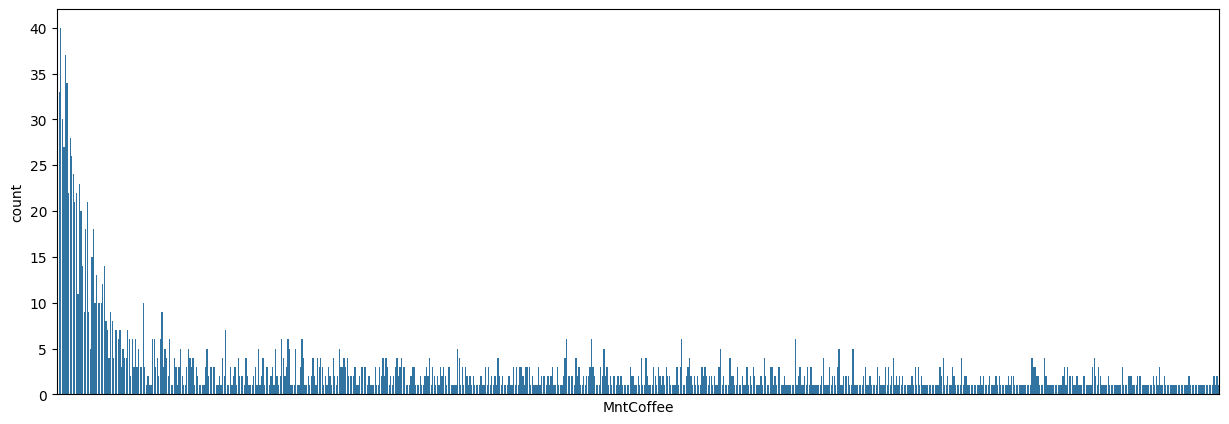

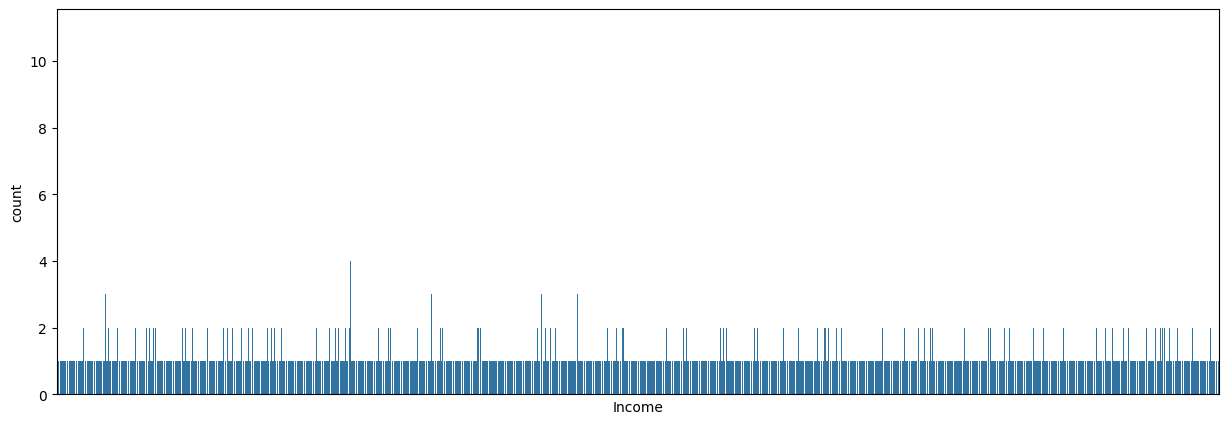

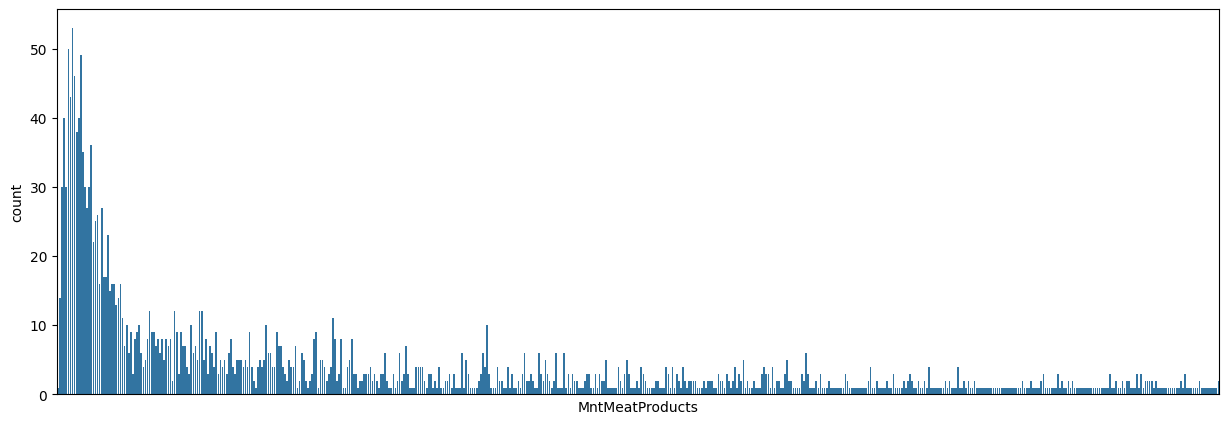

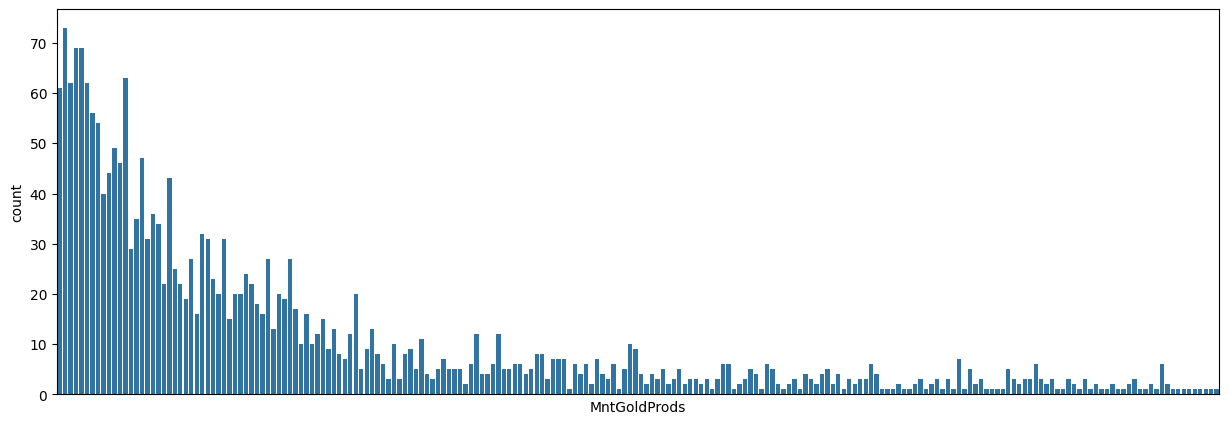

In [6]:
for feature, corr in top_four_features.items():
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sb.countplot(data=marketingDataDFEncoded, x=feature)
    plt.xticks(ticks=[], labels=[])
    

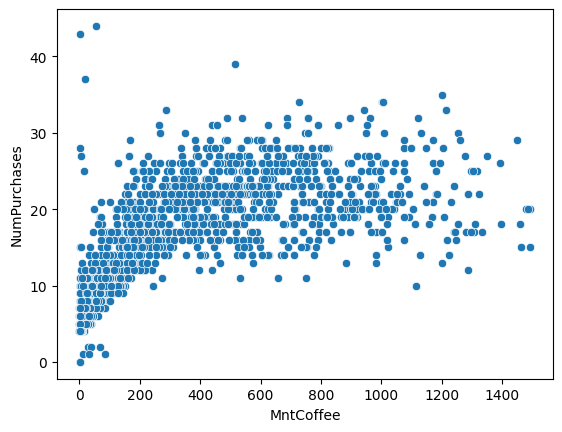

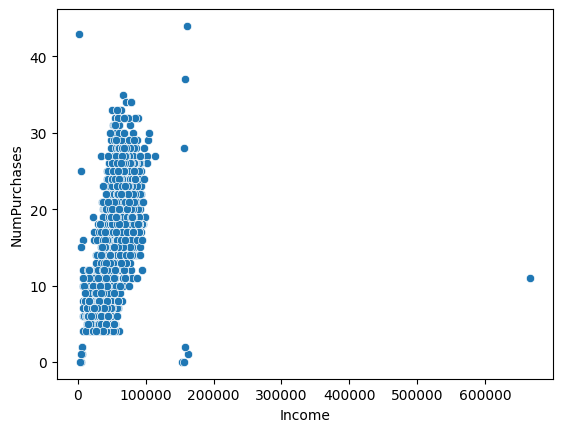

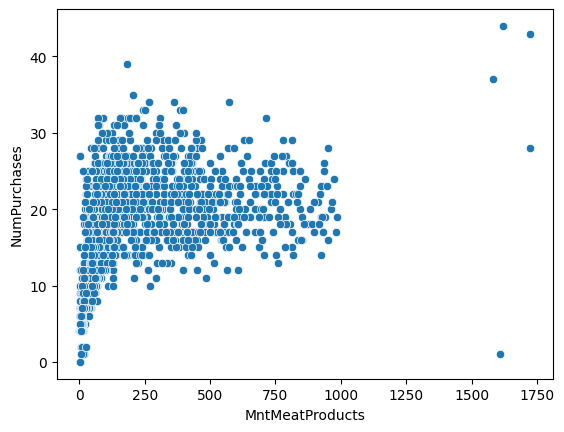

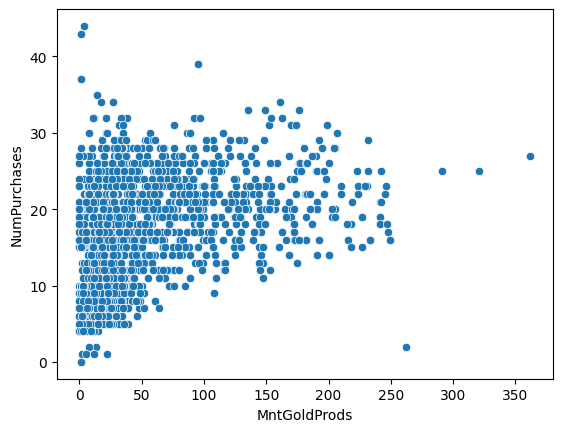

In [21]:
for feature, corr in top_four_features.items():
    plt.figure()
    sb.scatterplot(data=marketingDataDFEncoded, x=feature, y=target)

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [7]:
def simple_linear_regression(input_feature, output):
    # ToDo
    pass

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [8]:
def get_regression_predictions(input_feature, bias, slope):
    # ToDo
    pass

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [9]:
def get_root_mean_square_error(predicted_values, outputs):
    # ToDo
    pass

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [10]:
def get_r2_score(predicted_values, outputs):
    # ToDo
    pass

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [11]:
designated_feature_list = [] # ToDo

# ToDo
#  measure the performance of the simple linear regression model

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [12]:
def predict_output(feature_matrix, weights, bias):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    # ToDo
    pass

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [13]:
def feature_derivative(errors, feature):
    # ToDo
    pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [14]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    # ToDo
    pass

In [15]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = train_x[chosen_features]
    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = train_y
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [16]:
chosen_features = [] # ToDo
# ToDo
# compute the chosen_feature_matrix, train_weights, and bias

In [17]:
#ToDo
# compute the predictions

In [18]:
#ToDo
# Calculate the R2 score and mean square error
# Explain the results

## Three Feature Regression

Now repeat the steps for 3 features

In [19]:
# ToDo

## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [20]:
# ToDo